In [62]:
pip install mlxtend pyfpgrowth pandas matplotlib seaborn networkx

#Step 1: Implement Apriori Algorithm

In [63]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_excel('LAB1-ARM-Dataset.xlsx')
df = df.drop(columns=['Transaction ID'])

# Generate frequent itemsets
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)
print(rules_apriori)


        antecedents             consequents  antecedent support  \
0            (Cola)                 (Bread)            0.600000   
1           (Bread)                  (Cola)            0.733333   
2           (Juice)                 (Bread)            0.533333   
3           (Bread)                 (Juice)            0.733333   
4         (Chicken)                  (Milk)            0.600000   
..              ...                     ...                 ...   
389  (Cola, Diaper)          (Juice, Apple)            0.466667   
390         (Juice)   (Cola, Apple, Diaper)            0.533333   
391         (Apple)   (Juice, Diaper, Cola)            0.600000   
392        (Diaper)    (Juice, Apple, Cola)            0.733333   
393          (Cola)  (Juice, Apple, Diaper)            0.600000   

     consequent support   support  confidence      lift  representativity  \
0              0.733333  0.533333    0.888889  1.212121               1.0   
1              0.600000  0.533333    0.72

#Step 2: Implement FP-growth Algorithm

In [64]:
import pyfpgrowth

# Convert DataFrame to list of transactions
transactions = df.apply(lambda row: df.columns[row == 1].tolist(), axis=1).tolist()

# Find frequent patterns
patterns = pyfpgrowth.find_frequent_patterns(transactions, 3)  # Adjust support count
rules_fp = pyfpgrowth.generate_association_rules(patterns, 0.6)  # Adjust confidence

# Format rules into a DataFrame
rules_fp_df = pd.DataFrame([
    {'antecedents': k, 'consequents': v[0], 'confidence': v[1]}
    for k, v in rules_fp.items()
])
rules_fp_df


,antecedents,consequents,confidence
0,"(Banana, Bread)","(Milk,)",1.000000
1,"(Banana, Milk)","(Bread,)",0.750000
2,"(Apple, Banana)","(Diaper,)",1.000000
3,"(Banana, Diaper)","(Apple,)",1.000000
4,"(Beer, Bread)","(Diaper,)",0.750000
...,...,...,...
61,"(Apple, Cola, Milk)","(Bread,)",1.000000
62,"(Bread, Cola, Milk)","(Chicken,)",0.750000
63,"(Diaper, Milk)","(Bread,)",0.666667
64,"(Chicken, Cola, Milk)","(Bread,)",1.000000


#Step 3: Visualizing the Association Rules
3.1: Scatter Plot (Support vs Confidence vs Lift)

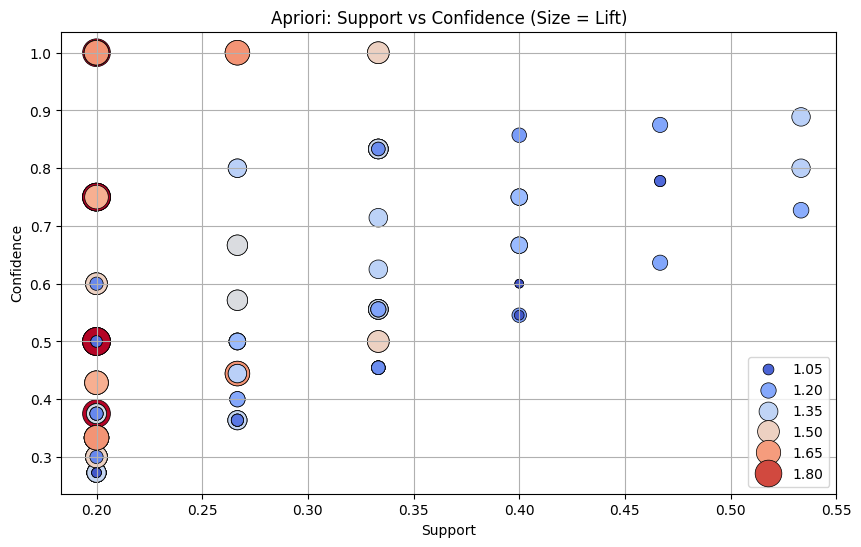

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules_apriori,
    x='support', y='confidence', size='lift', hue='lift',
    palette='coolwarm', sizes=(40, 400), edgecolor='black'
)
plt.title('Apriori: Support vs Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.grid(True)
plt.show()


3.2: Network Graph of Rules

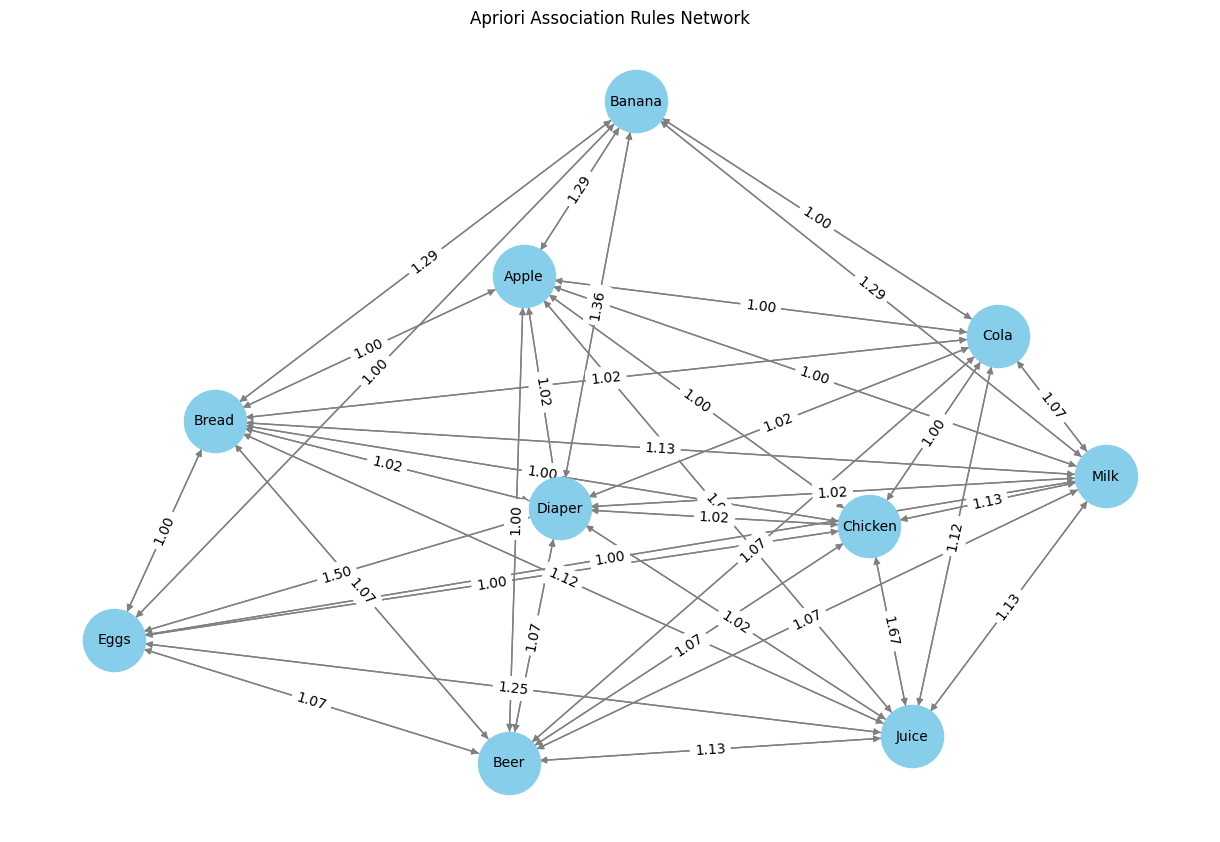

In [66]:
import networkx as nx

def draw_graph(rules, title):
    G = nx.DiGraph()
    for _, rule in rules.iterrows():
        for ant in rule['antecedents']:
            for cons in rule['consequents']:
                G.add_edge(ant, cons, weight=rule['lift'])

    pos = nx.spring_layout(G, k=2)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(k): f"{v:.2f}" for k, v in edge_labels.items()})
    plt.title(title)
    plt.show()

# For Apriori rules
rules_apriori_graph = rules_apriori.copy()
rules_apriori_graph['antecedents'] = rules_apriori_graph['antecedents'].apply(lambda x: list(x))
rules_apriori_graph['consequents'] = rules_apriori_graph['consequents'].apply(lambda x: list(x))

draw_graph(rules_apriori_graph, "Apriori Association Rules Network")


#Results:
#Apriori Output
Frequent Itemsets:

In [67]:
print(frequent_itemsets_apriori)


      support                        itemsets
0    0.733333                         (Bread)
1    0.666667                          (Milk)
2    0.733333                        (Diaper)
3    0.466667                          (Beer)
4    0.600000                          (Cola)
..        ...                             ...
113  0.200000     (Juice, Apple, Bread, Cola)
114  0.200000   (Chicken, Milk, Eggs, Diaper)
115  0.200000  (Chicken, Apple, Milk, Diaper)
116  0.200000  (Juice, Milk, Chicken, Diaper)
117  0.200000    (Juice, Apple, Diaper, Cola)

[118 rows x 2 columns]


Association Rules:

In [68]:
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


        antecedents             consequents   support  confidence      lift
0            (Cola)                 (Bread)  0.533333    0.888889  1.212121
1           (Bread)                  (Cola)  0.533333    0.727273  1.212121
2           (Juice)                 (Bread)  0.400000    0.750000  1.022727
3           (Bread)                 (Juice)  0.400000    0.545455  1.022727
4         (Chicken)                  (Milk)  0.533333    0.888889  1.333333
..              ...                     ...       ...         ...       ...
389  (Cola, Diaper)          (Juice, Apple)  0.200000    0.428571  1.607143
390         (Juice)   (Cola, Apple, Diaper)  0.200000    0.375000  1.125000
391         (Apple)   (Juice, Diaper, Cola)  0.200000    0.333333  1.000000
392        (Diaper)    (Juice, Apple, Cola)  0.200000    0.272727  1.022727
393          (Cola)  (Juice, Apple, Diaper)  0.200000    0.333333  1.666667

[394 rows x 5 columns]


#FP-growth Output
Frequent patterns and rules:

In [69]:
print(patterns)
rules_fp_df

{('Banana', 'Eggs'): 3, ('Banana', 'Bread'): 3, ('Banana', 'Bread', 'Milk'): 3, ('Apple', 'Banana'): 3, ('Banana', 'Cola'): 3, ('Banana', 'Diaper'): 3, ('Apple', 'Banana', 'Diaper'): 3, ('Banana', 'Milk'): 4, ('Beer', 'Cola'): 3, ('Beer', 'Bread', 'Cola'): 3, ('Beer', 'Cola', 'Diaper'): 3, ('Beer', 'Bread', 'Cola', 'Diaper'): 3, ('Beer', 'Juice'): 3, ('Beer', 'Diaper', 'Juice'): 3, ('Beer', 'Eggs'): 4, ('Beer', 'Eggs', 'Milk'): 3, ('Beer', 'Chicken', 'Milk'): 3, ('Beer', 'Bread'): 4, ('Beer', 'Bread', 'Diaper'): 3, ('Apple', 'Beer'): 4, ('Apple', 'Beer', 'Diaper'): 3, ('Beer', 'Chicken'): 4, ('Beer', 'Chicken', 'Diaper'): 3, ('Beer', 'Diaper'): 5, ('Apple', 'Bread', 'Juice'): 3, ('Apple', 'Bread', 'Cola', 'Juice'): 3, ('Apple', 'Diaper', 'Juice'): 3, ('Apple', 'Cola', 'Diaper', 'Juice'): 3, ('Apple', 'Cola', 'Juice'): 4, ('Bread', 'Juice', 'Milk'): 3, ('Bread', 'Chicken', 'Juice', 'Milk'): 3, ('Diaper', 'Juice', 'Milk'): 3, ('Chicken', 'Diaper', 'Juice', 'Milk'): 3, ('Chicken', 'Juice'

,antecedents,consequents,confidence
0,"(Banana, Bread)","(Milk,)",1.000000
1,"(Banana, Milk)","(Bread,)",0.750000
2,"(Apple, Banana)","(Diaper,)",1.000000
3,"(Banana, Diaper)","(Apple,)",1.000000
4,"(Beer, Bread)","(Diaper,)",0.750000
...,...,...,...
61,"(Apple, Cola, Milk)","(Bread,)",1.000000
62,"(Bread, Cola, Milk)","(Chicken,)",0.750000
63,"(Diaper, Milk)","(Bread,)",0.666667
64,"(Chicken, Cola, Milk)","(Bread,)",1.000000
